# Business Case: Yulu - Hypothesis Testing

<img src="Yulu.jpg" alt="Alt text" height="300" width="1200"/>



### About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.



### How you can help here?

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands

In [298]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [299]:
df=pd.read_csv('bike_sharing.csv')

In [300]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [301]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- above we can see that the datetime is in string format so we need to transform it to the datetime format

In [302]:
df['datetime']=pd.to_datetime(df['datetime'])

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## null detection

In [304]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- there is no null value in the dataset

## unique values

In [305]:
for i in df.columns:
    ui=df[i].nunique()
    print(f"Number of unique value in {i} column are {ui}")  

Number of unique value in datetime column are 10886
Number of unique value in season column are 4
Number of unique value in holiday column are 2
Number of unique value in workingday column are 2
Number of unique value in weather column are 4
Number of unique value in temp column are 49
Number of unique value in atemp column are 60
Number of unique value in humidity column are 89
Number of unique value in windspeed column are 28
Number of unique value in casual column are 309
Number of unique value in registered column are 731
Number of unique value in count column are 822


- we can clearly see that the season,holiday,workingday,weather are the categorical data 

In [306]:
df['season']=df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'})

df['holiday']=df['holiday'].replace({0:'Non-holiday',1:'Holiday'})

df['workingday']=df['workingday'].replace({0:'Non-workingday',1:'workingday'})

df['weather']=df['weather'].replace({1:'clear',2:'mist',3:'light snow',4:'heavy rain'})

In [307]:
df.iloc[:,4:].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


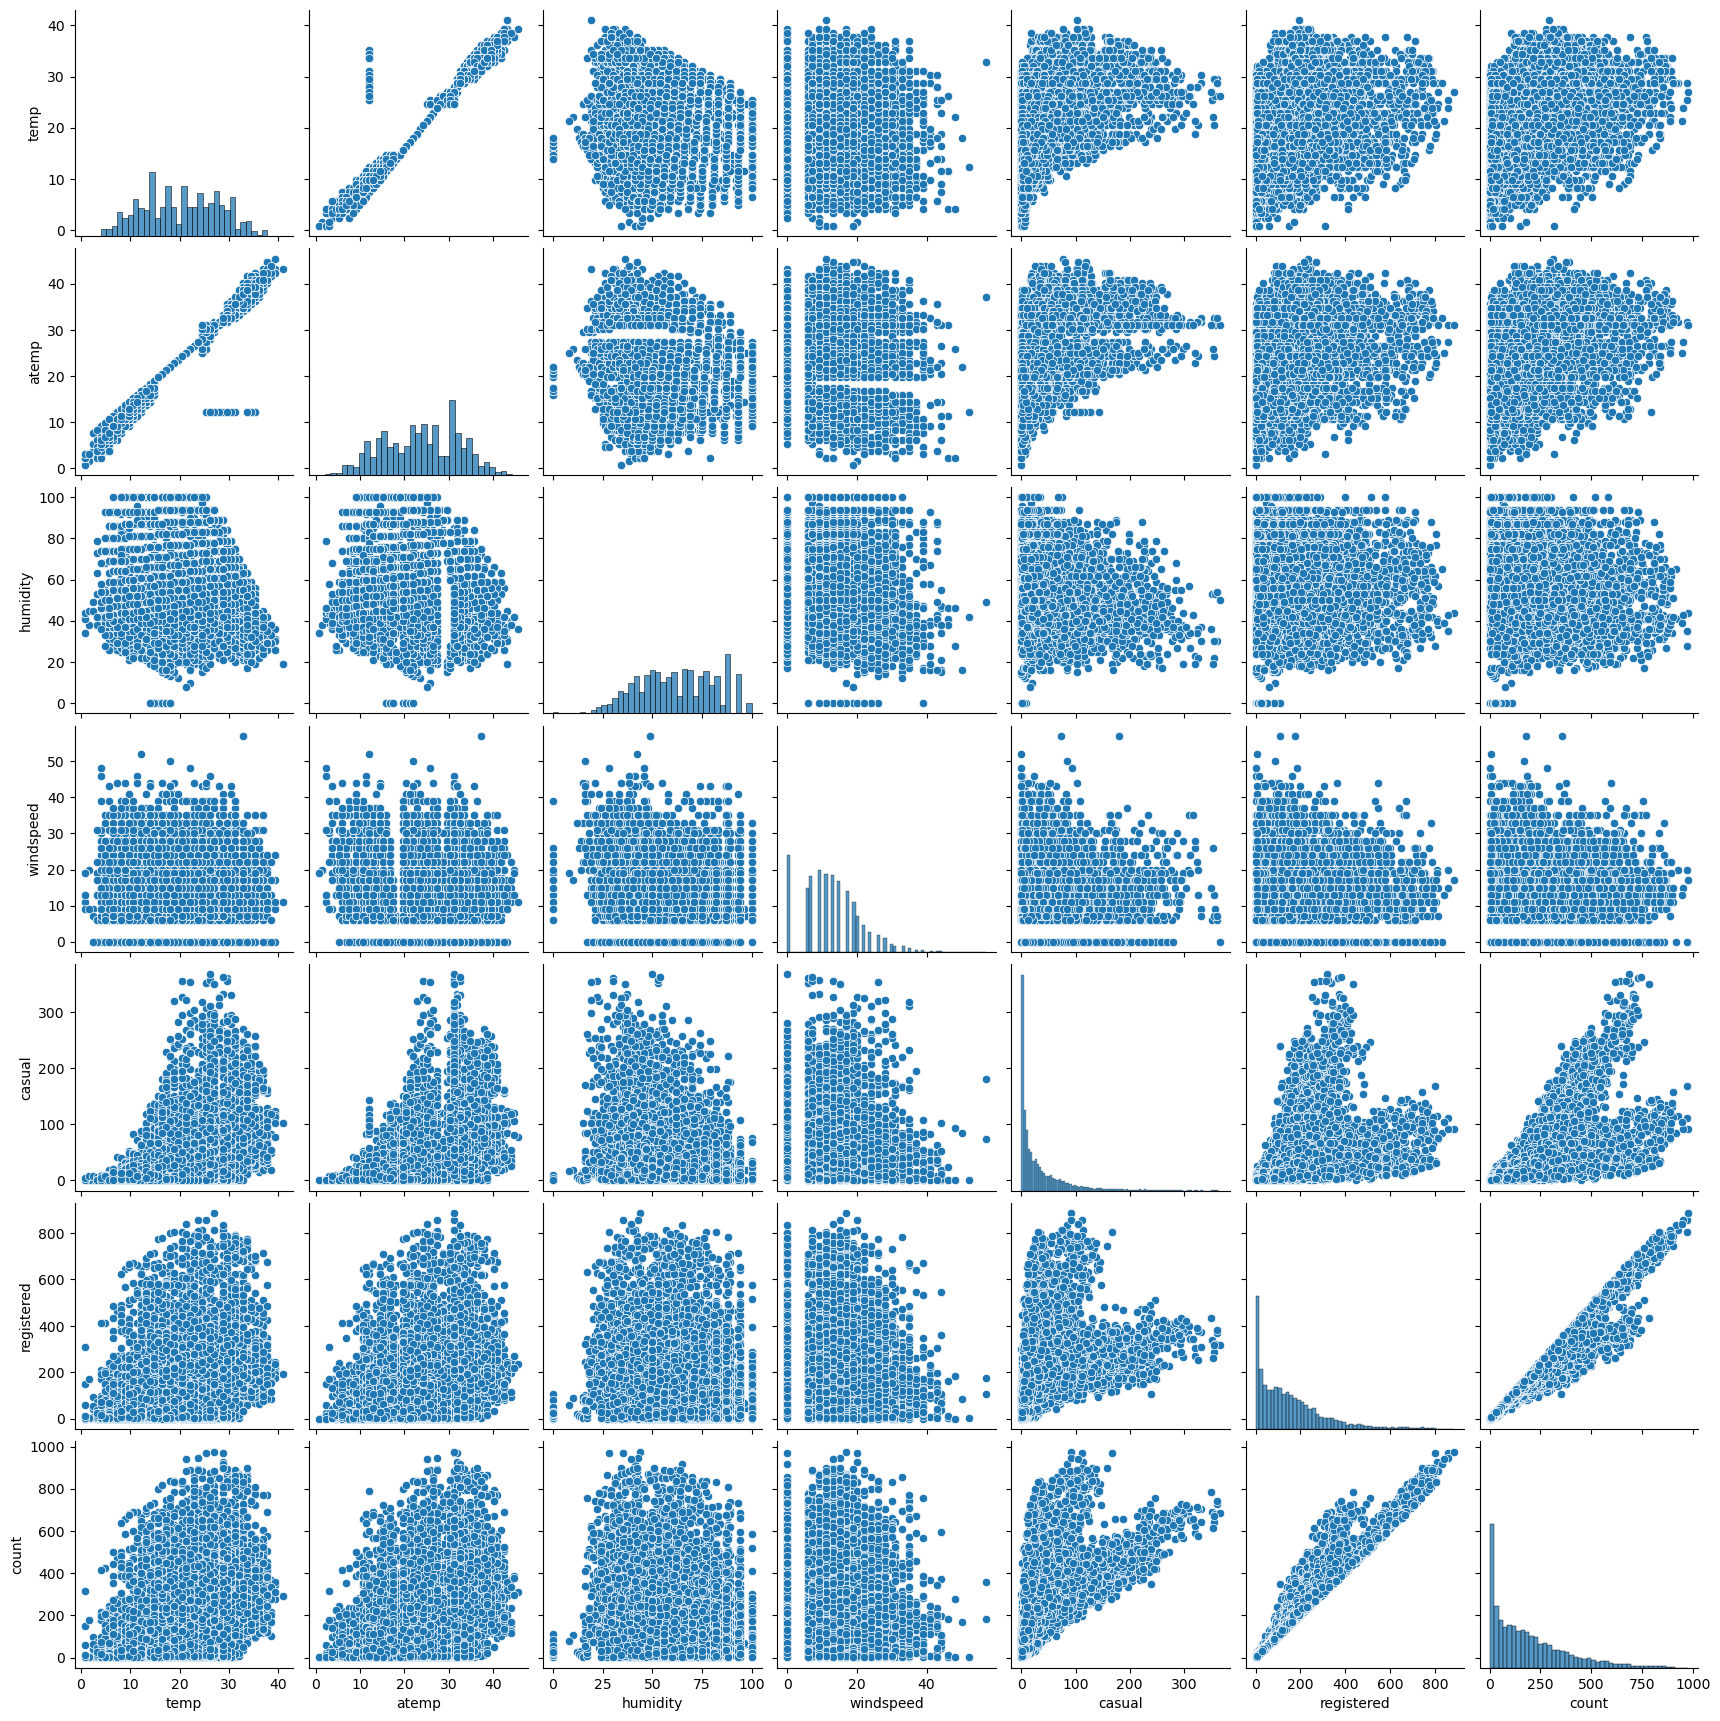

In [308]:
sns.pairplot(df)

## Univariate analysis

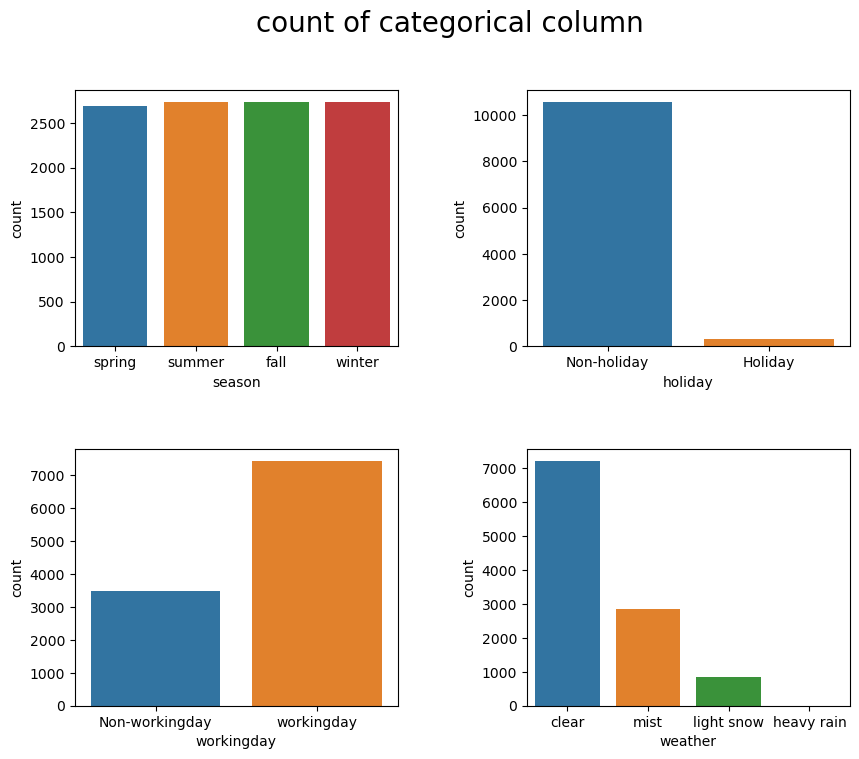

In [309]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=.4,hspace=.4)
plt.suptitle('count of categorical column',fontsize=20,weight=20)

plt.subplot(221)
sns.countplot(df,x='season')

plt.subplot(222)
sns.countplot(df,x='holiday')

plt.subplot(223)
sns.countplot(df,x='workingday')

plt.subplot(224)
sns.countplot(df,x='weather')
plt.show()

## Bivariate analysis

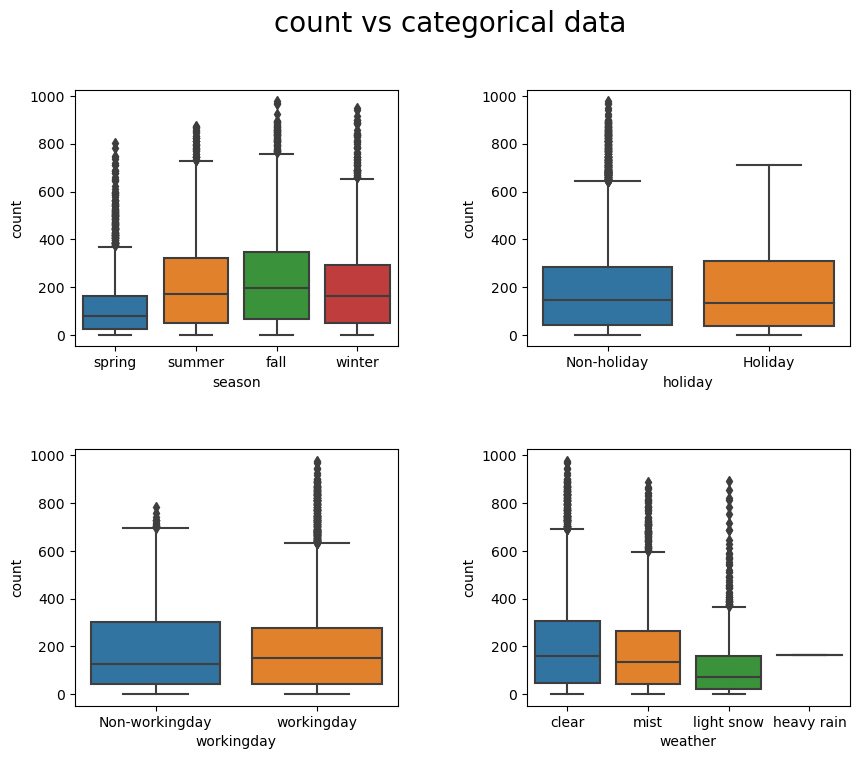

In [310]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=.4,hspace=.4)
plt.suptitle('count vs categorical data',fontsize=20,weight=20)

plt.subplot(221)
sns.boxplot(df,x='season',y='count')

plt.subplot(222)
sns.boxplot(df,x='holiday',y='count')

plt.subplot(223)
sns.boxplot(df,x='workingday',y='count')

plt.subplot(224)
sns.boxplot(df,x='weather',y='count')
plt.show()

## seasons

- season wise data for count of cycles rented

In [311]:
df.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


### total no. of cycles rented in diff.seasons

In [312]:
df.groupby('season')['count'].sum()

season
fall      640662
spring    312498
summer    588282
winter    544034
Name: count, dtype: int64

<Axes: xlabel='season', ylabel='count'>

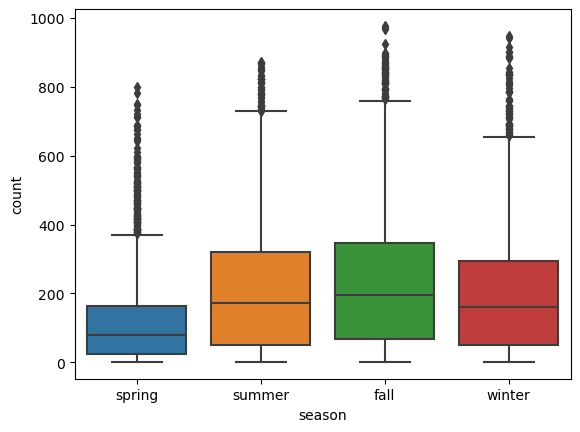

In [313]:
sns.boxplot(df,x='season',y='count')

### No. of cycles rented is similar or different in different seasons

In [314]:
df_fall=df[df['season']=='fall']['count']
df_spring=df[df['season']=='spring']['count']
df_summer=df[df['season']=='summer']['count']
df_winter=df[df['season']=='winter']['count']

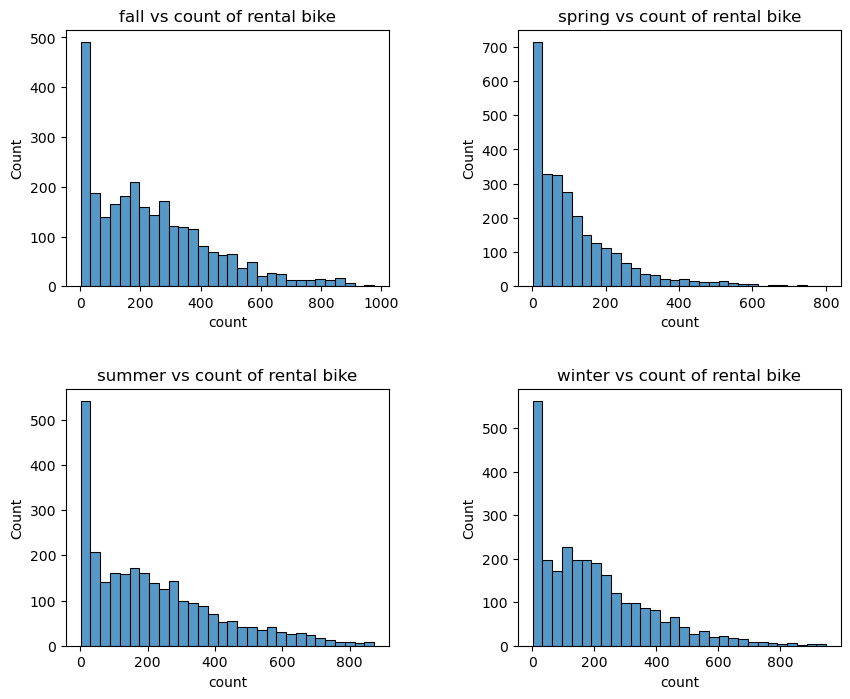

In [315]:
plt.figure(figsize=(10,8))
x=[df_fall,df_spring,df_summer,df_winter]
y=['df_fall','df_spring','df_summer','df_winter']
for i in range(len(x)):
    plt.subplot(220+1+i)
    sns.histplot(x[i],bins=30)
    plt.title(f'{y[i][3:]} vs count of rental bike')
plt.subplots_adjust(hspace=.4,wspace=.4)

<Axes: xlabel='count', ylabel='Count'>

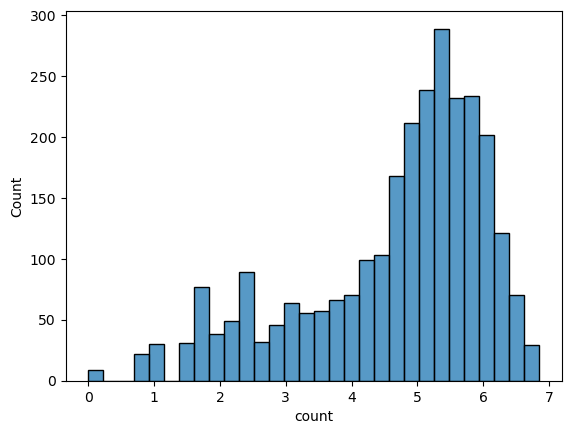

In [316]:
sns.histplot(np.log(df_winter),bins=30)

 - As we can see that the above plot don,t show the normal distribution so we will be taking the kruskal-wallis test for the Hypothesis testing

### testing for normality

In [317]:
from scipy.stats import shapiro
stats,pvalue=shapiro(df_spring.sample(1000))
if pvalue>.05:
    print(' distribution is normal') 
else:print(f'pvalue is {pvalue} so distribution is not normal')

pvalue is 4.8737230054160403e-33 so distribution is not normal


### kruskal-wallis hypothesis testing of seasons

In [318]:
from scipy.stats import kruskal
# Null hypothesis
H0='count of rental bike do not depends on seasons'
# Alternate hypothesis
HA='count of rental bike do depends on seasons'
#taking significance level as 95%
alpha=.05

stats,pvalue=kruskal(df_fall,df_spring,df_summer,df_winter)

print(f'pvalue is {pvalue:.3f}')

if pvalue<alpha:
    print(f'reject null hypothesis hence {HA}')
else:
    print(f'unable to reject null hypothesis hence {H0}')

pvalue is 0.000
reject null hypothesis hence count of rental bike do depends on seasons


- now checking for fall vs summer for highest mean cycles rented

In [319]:
from scipy.stats import ttest_ind

# Null hypothesis
H0='count of rental bike in fall season are not higher'
# Alternate hypothesis
HA='count of rental bike on fall season are higher'
#taking significance level as 95%
alpha=.05

statistic, p_value = ttest_ind(df_fall, df_summer,alternative='greater',equal_var=False)

print(f'pvalue is {p_value:.3f}')

if p_value<alpha:
    print(f'reject null hypothesis hence {HA}')
else:
    print(f'unable to reject null hypothesis hence {H0}')

pvalue is 0.000
reject null hypothesis hence count of rental bike on fall season are higher


- so from the above analysis we can conclude that the rental bike frequency depends on the season and it is highest in the fall season

## holiday vs non- holiday

In [320]:
df['holiday'].value_counts()

Non-holiday    10575
Holiday          311
Name: holiday, dtype: int64

In [321]:
df.groupby('holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
Holiday,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0
Non-holiday,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0


<Axes: xlabel='holiday', ylabel='count'>

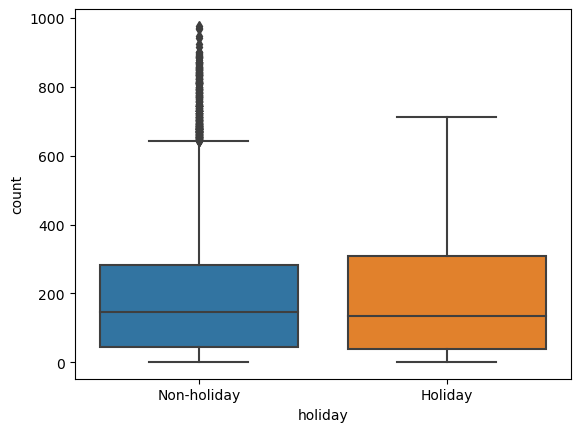

In [322]:
sns.boxplot(df,x='holiday',y='count')

In [323]:
h_day=df[df['holiday']=='Holiday']['count'].sample(300)
nh_day=df[df['holiday']=='Non-holiday']['count'].sample(300)

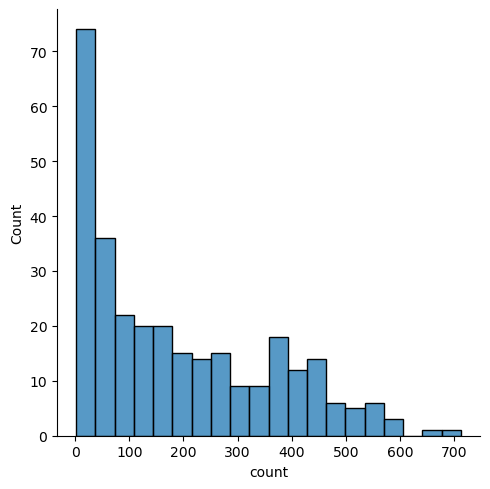

In [324]:
sns.displot(h_day,bins=20)

## performing ttest_ind for checking if the rental booking depends on holiday or not

In [325]:
from scipy.stats import ttest_ind

# Null hypothesis
H0='count of rental bike on non-holiday are not higher'
# Alternate hypothesis
HA='count of rental bike on non-holiday are higher'
#taking significance level as 95%
alpha=.05

statistic, p_value = ttest_ind(nh_day, h_day,alternative='greater',equal_var=False)

print(f'pvalue is {p_value:.3f}')

if p_value<alpha:
    print(f'reject null hypothesis hence {HA}')
else:
    print(f'unable to reject null hypothesis hence {H0}')

pvalue is 0.451
unable to reject null hypothesis hence count of rental bike on non-holiday are not higher


## Working Day has effect on number of electric cycles rented ?

In [326]:
# workingday: if day is neither weekend nor holiday is workingday, otherwise is non-workingday.
df['workingday'].value_counts()

workingday        7412
Non-workingday    3474
Name: workingday, dtype: int64

In [327]:
df.groupby('workingday')['count'].sum()

workingday
Non-workingday     654872
workingday        1430604
Name: count, dtype: int64

Text(0.5, 1.0, ' boxplot of workingday vs count of rental bike')

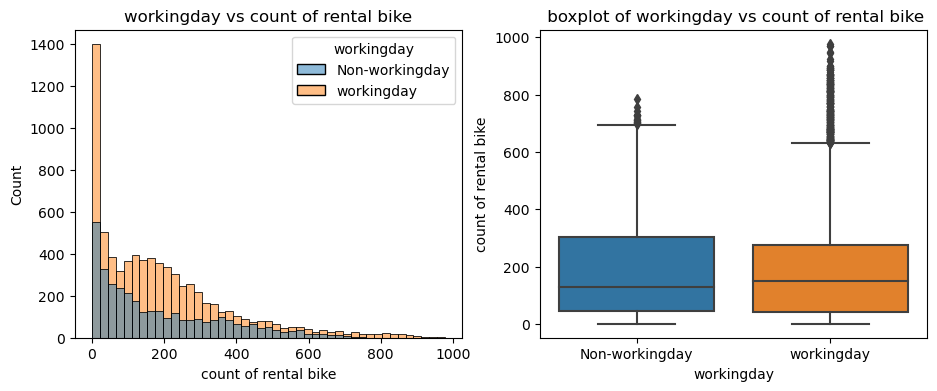

In [328]:
plt.figure(figsize=(11,4))
plt.subplot(121)
sns.histplot(df,x='count',hue='workingday')
plt.xlabel('count of rental bike')
plt.title('workingday vs count of rental bike')

plt.subplot(122)
sns.boxplot(df,y='count',x='workingday')
plt.ylabel('count of rental bike')
plt.title(' boxplot of workingday vs count of rental bike')

In [329]:
df_wking=df[df['workingday']=='workingday']['count']
df_nwking=df[df['workingday']=='Non-workingday']['count']

In [330]:
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
Non-workingday,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
workingday,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


### ttest for workingday if non-working day mean is higher than the working day mean

In [331]:
from scipy.stats import ttest_ind

df_wking=df[df['workingday']=='workingday']['count']
df_nwking=df[df['workingday']=='Non-workingday']['count']

# Null hypothesis
H0='count of rental bike on workingday are not higher'
# Alternate hypothesis
HA='count of rental bike on workingday are higher'
#taking significance level as 95%
alpha=.05

statistic, p_value = ttest_ind(df_nwking, df_wking,alternative='greater',equal_var=False)

print(f'pvalue is {p_value:.3f}')

if p_value<alpha:
    print(f'reject null hypothesis hence {HA}')
else:
    print(f'unable to reject null hypothesis hence {H0}')

pvalue is 0.892
unable to reject null hypothesis hence count of rental bike on workingday are not higher


## Dependence on weather

In [332]:
df['weather'].value_counts()

clear         7192
mist          2834
light snow     859
heavy rain       1
Name: weather, dtype: int64

In [333]:
df.groupby('weather')['count'].sum()

weather
clear         1476063
heavy rain        164
light snow     102089
mist           507160
Name: count, dtype: int64

In [334]:
df.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
clear,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
heavy rain,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0
light snow,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
mist,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0


Text(0.5, 1.0, ' boxplot of weather vs count of rental bike')

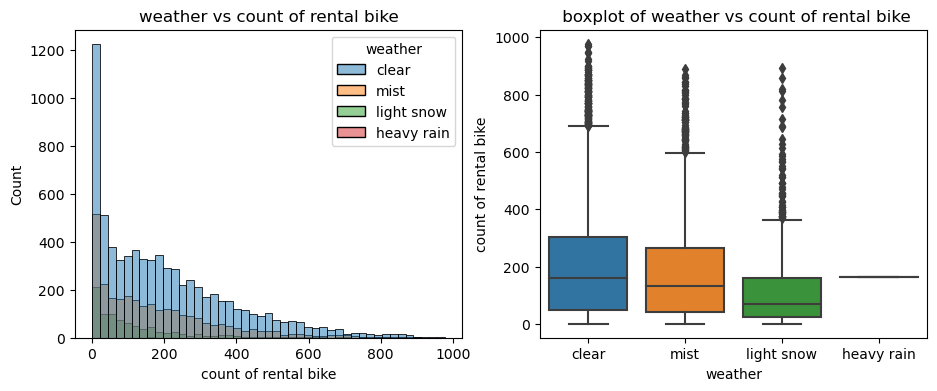

In [335]:
plt.figure(figsize=(11,4))
plt.subplot(121)
sns.histplot(df,x='count',hue='weather')
plt.xlabel('count of rental bike')
plt.title('weather vs count of rental bike')

plt.subplot(122)
sns.boxplot(df,y='count',x='weather')
plt.ylabel('count of rental bike')
plt.title(' boxplot of weather vs count of rental bike')

In [336]:
df_clear=df[df['weather']=='clear']['count'].sample(800)
df_mist=df[df['weather']=='mist']['count'].sample(800)
df_lightsnow =df[df['weather']=='light snow']['count'].sample(800)

In [337]:
from scipy.stats import shapiro
stats,pvalue=shapiro(df_clear.sample(800))
if pvalue>.05:
    print(' distribution is normal') 
else:print(f'pvalue is {pvalue} so distribution is not normal')

pvalue is 8.22266955746587e-24 so distribution is not normal


### kruskal-wallis test for weather

In [338]:
from scipy.stats import kruskal

# Null hypothesis
H0='count of rental bike do not depends on weather'
# Alternate hypothesis
HA='count of rental bike do depends on weather'
#taking significance level as 95%
alpha=.05

stats,pvalue=kruskal(df_clear,df_mist,df_lightsnow)

print(f'pvalue is {pvalue:.3f}')

if pvalue<alpha:
    print(f'reject null hypothesis hence {HA}')
else:
    print(f'unable to reject null hypothesis hence {H0}')

pvalue is 0.000
reject null hypothesis hence count of rental bike do depends on weather


### clear vs mist

In [339]:
from scipy.stats import ttest_ind

# Null hypothesis
H0='count of rental bike on clear days are not higher'
# Alternate hypothesis
HA='count of rental bike on clear days are higher'
#taking significance level as 95%
alpha=.05

statistic, p_value = ttest_ind(df_clear, df_mist,alternative='greater',equal_var=False)

print(f'pvalue is {p_value:.3f}')

if p_value<alpha:
    print(f'reject null hypothesis hence {HA}')
else:
    print(f'unable to reject null hypothesis hence {H0}')

pvalue is 0.004
reject null hypothesis hence count of rental bike on clear days are higher


- from the above analysis we can conclude that booking of yulu bikes depend on the weather and it is highest on the clear days

## weather vs season

In [340]:
w_s=pd.crosstab(df['weather'],df['season'])
w_s

season,fall,spring,summer,winter
weather,,,,
clear,1930,1759,1801,1702
heavy rain,0,1,0,0
light snow,199,211,224,225
mist,604,715,708,807


In [341]:
from scipy.stats import chi2_contingency

H0='both are independent'
HA='weather and season are dependent'

stat,pvalue,dof,expected=chi2_contingency(w_s)
print(f'pvalue={pvalue}')
if pvalue<.05:
    print(f'reject null hypothesis hence {HA}')
else :print(f'unable to reject null hypothesis and {H0}')

pvalue=1.5499250736864862e-07
reject null hypothesis hence weather and season are dependent


## temp vs temp feel

<Axes: xlabel='temp', ylabel='Count'>

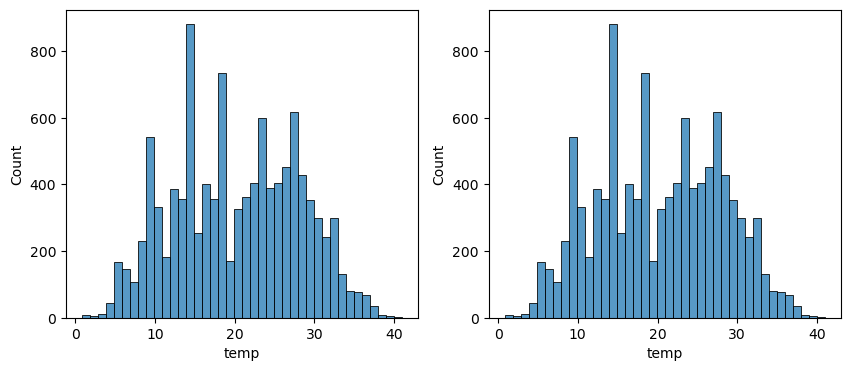

In [342]:
# temp: temperature in Celsius
# atemp: feeling temperature in Celsius
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.histplot(df['temp'],bins=40)
plt.subplot(122)
sns.histplot(df['temp'],bins=40)

In [343]:
from scipy.stats import shapiro

data = df['temp']
H0='The data appears to be normally distributed'
HA='The data is not normally distributed'

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(data.sample(1000))
print(f'pvalue={pvalue}')

if p_value < 0.05:
    print(" reject null hypothesis and The data is not normally distributed.")
else:
    print("unable to reject null hypothesis The data appears to be normally distributed.")


pvalue=1.5499250736864862e-07
 reject null hypothesis and The data is not normally distributed.


### ttest_rel for checking if both are dependent on each other

In [344]:
from scipy.stats import ttest_rel

H0= 'both are independent'
HA= 'both are dependent'

stat,pvalue=ttest_rel(df['temp'],df['atemp'])
print(f'pvalue={pvalue}')
if pvalue<.05:
    print('reject null hypothesis '+ HA)
else : print('unable to reject null hypothesis '+H0)

pvalue=0.0
reject null hypothesis both are dependent


### Bike booking dependence on Datetime 

In [345]:
df['month']=df['datetime'].dt.month

df['year']=df['datetime'].dt.year

df['day_of_week']=df['datetime'].dt.day_of_week

df['date']=df['datetime'].dt.date

df['day_of_month']=df['datetime'].dt.day


In [346]:
df.groupby(df['year'])['count'].sum()

year
2011     781979
2012    1303497
Name: count, dtype: int64

In [347]:
df.groupby(df['month'])['count'].sum()

month
1      79884
2      99113
3     133501
4     167402
5     200147
6     220733
7     214617
8     213516
9     212529
10    207434
11    176440
12    160160
Name: count, dtype: int64

In [348]:
df.groupby(df['day_of_week'])['count'].sum()

day_of_week
0    295296
1    291985
2    292226
3    306401
4    302504
5    311518
6    285546
Name: count, dtype: int64

In [349]:
df.groupby(df['day_of_month'])['count'].sum()

day_of_month
1     103692
2     105381
3     111561
4     112335
5     109115
6     108600
7     105486
8     102770
9     108041
10    111645
11    111146
12    109257
13    111448
14    112406
15    115677
16    109837
17    118255
18    108437
19    110387
Name: count, dtype: int64

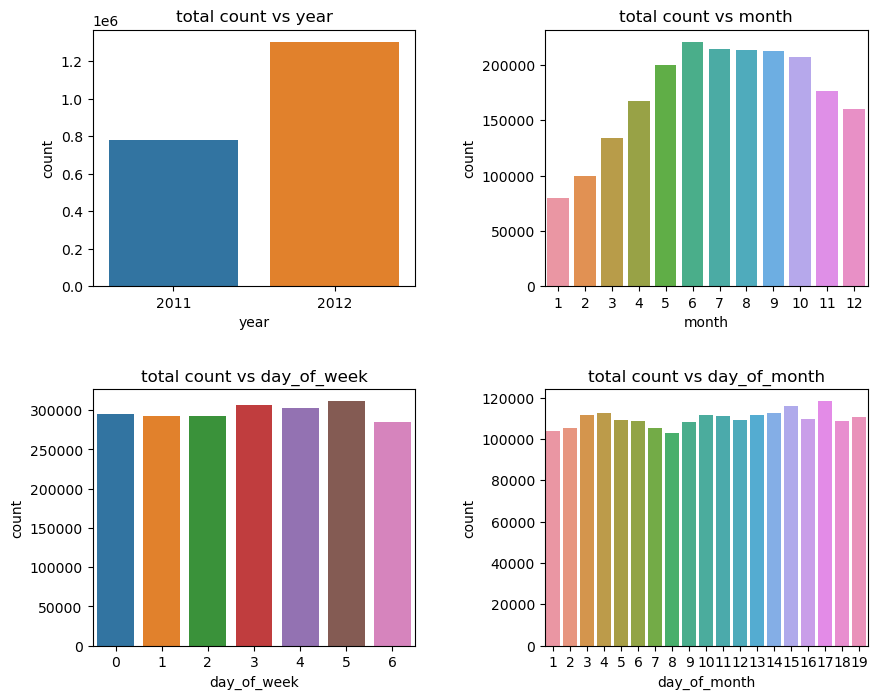

In [350]:
plt.figure(figsize=(10,8))
x=['year','month','day_of_week','day_of_month']
for i in range(len(x)):
    a=df.groupby(df[x[i]])['count'].sum().reset_index()
    plt.subplot(220+i+1)
    sns.barplot(a,x=x[i],y='count')
    plt.title(f'total count vs {x[i]}')
plt.subplots_adjust(hspace=.4,wspace=.4)


- there  is an increase in the booking from 2011 to 2012 and we can see in the plot that there are fewer booking in the winter months than the summer month

In [351]:
def timeslot(x):
    x=x.hour
    if (x>=6) & (x<12):return 'morning'
    elif (x>=12) & (x<16):return 'afternoon'
    elif (x>=16) & (x<21):return 'evening'
    else :return 'night'
df['slot']=df['datetime'].apply(timeslot)

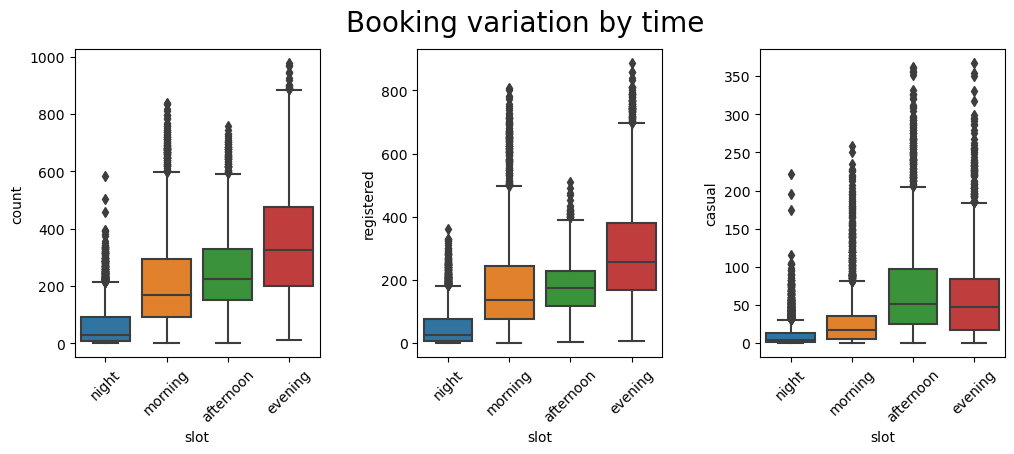

In [352]:
plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace=.4)
plt.suptitle('Booking variation by time',fontsize=20,fontweight=20)

plt.subplot(131)
sns.boxplot(df,y='count',x='slot')
plt.xticks(rotation=45)

plt.subplot(132)
sns.boxplot(df,y='registered',x='slot')
plt.xticks(rotation=45)

plt.subplot(133)
sns.boxplot(df,y='casual',x='slot')
plt.xticks(rotation=45)


plt.show()

- Here we can clearly see that there are more booking in the evening than any other timeslot,but casual customer are booking more on the afternoon time

# Insights

- Dependence on the season- as the data is not normally distributed so using kruskal wallis test and ttest we found that the rental bike frequency depends on the season and it is highest in the fall season
- Dependence on weather- as the data is not normally distributed so using kruskal wallis test and ttest we found that the rental bike frequency depends on the season and it is highest in the clear days
- Holidays vs non- holidays - in the analysis we can't say with surity that booking is dependent on the holidays/non holidays
- workingday vs non workingdays - in the analysis we can't say with surity that booking is dependent on the workingday/non workingdays
- we also found out that there more booking in summer month than the winter month
- there are more booking in the evening time than any other time

# Recommendation:

- From the above analysis we can clearly see the dependence of booking on season , weather and the time of the day therefor for optimization of booking we can give some discount in winter season when there are lesser booking ,in the early morning when the booking is very less and on the rainy and cloudy days 
- On the other hand we can rationalize the dynamic costing machanism by increasing it in the evening or whenever the traffic is higher 
- Charging of cycles and other maintenance works can be done during the low traffic time slots like early in the morning before the office hours